In machine learning, choosing the right scaling technique is crucial for ensuring your models perform well. In scikit-learn, the most common scaling techniques are:

1. **StandardScaler** (Standardization)
2. **MinMaxScaler** (Normalization)
3. **RobustScaler**
4. **MaxAbsScaler**
5. **Normalizer**

Here's when and why to use each:

### 1. **StandardScaler** (Standardization)
   - **When to Use**: 
     - When your data follows a Gaussian (normal) distribution.
     - Algorithms that assume or benefit from standard normally distributed data (mean = 0, variance = 1) such as **SVM, Logistic Regression, Linear Regression, PCA**.
   - **Why**: 
     - It scales the data to have a mean of 0 and a standard deviation of 1, which can improve the convergence speed and accuracy of gradient-based algorithms.

### 2. **MinMaxScaler** (Normalization)
   - **When to Use**: 
     - When you want to bound the feature values between a fixed range, typically [0, 1].
     - Works well for algorithms that do not assume any particular distribution of the data, such as **Neural Networks, K-Nearest Neighbors (KNN)**.
   - **Why**: 
     - It rescales the data to fit within a specified range, making it sensitive to outliers since it uses the min and max values for scaling.

### 3. **RobustScaler**
   - **When to Use**: 
     - When your data contains outliers.
     - Suitable for any model where outlier influence needs to be reduced.
   - **Why**: 
     - It scales features using the median and the interquartile range, making it robust to outliers.

### 4. **MaxAbsScaler**
   - **When to Use**: 
     - When data is sparse and you want to scale each feature to the [-1, 1] range without centering.
     - Commonly used with **Sparse Data**, e.g., text data represented in sparse matrices.
   - **Why**: 
     - It scales data by the maximum absolute value, keeping zero entries unchanged and thus maintaining sparsity.

### 5. **Normalizer**
   - **When to Use**: 
     - When you want to scale each sample to have a unit norm.
     - Useful for **Sparse Data** and models where the direction of the data matters more than the magnitude, such as **K-Nearest Neighbors, Neural Networks**.
   - **Why**: 
     - It scales each individual sample (rather than each feature) to have a unit norm, typically used in text classification and clustering.

### Summary:
- Use **StandardScaler** for normally distributed data.
- Use **MinMaxScaler** when you need to scale data to a specific range.
- Use **RobustScaler** if your data contains outliers.
- Use **MaxAbsScaler** for sparse data to keep zero entries unchanged.
- Use **Normalizer** when you need to normalize sample vectors individually to unit norm.

Choosing the right scaling technique depends on the data distribution and the specific requirements of your machine learning algorithm.

| Technique         | Best For                                                                 | Avoid When                                      |
|--------------------|-------------------------------------------------------------------------|------------------------------------------------|
| **StandardScaler** | Normally distributed data, algorithms assuming standard normal          | Data with significant outliers                 |
| **MinMaxScaler**   | Deep learning, features with varying magnitudes                        | Data with outliers                             |
| **MaxAbsScaler**   | Sparse data                                                            | Dense datasets                                 |
| **RobustScaler**   | Data with outliers                                                     | Outliers are not present                       |
| **Normalizer**     | Proportions, cosine similarity-based models                            | Magnitudes are significant                     |

Choose the technique that aligns with the assumptions of the algorithm and the characteristics of your dataset!

c:\Users\phoni\miniconda3\envs\python_ml\Lib\site-packages\sklearn\preprocessing\_data.py:2824: UserWarning: n_quantiles (1000) is greater than the total number of samples (500). n_quantiles is set to n_samples.
  warnings.warn(


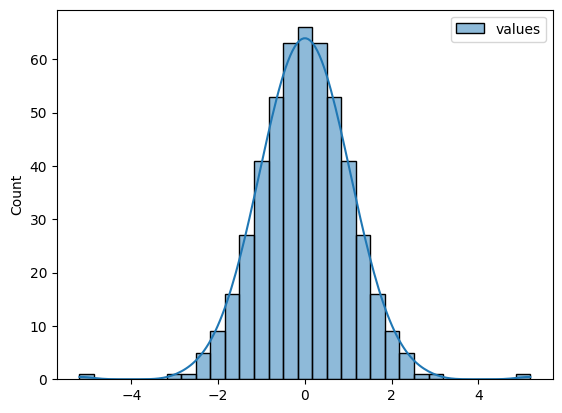

       values
0    0.118323
1    0.611177
2    0.277283
3    0.108212
4   -0.169083
..        ...
495 -0.575238
496 -0.067867
497 -0.220282
498 -0.672914
499  0.032657

[500 rows x 1 columns]


In [69]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

# robust scaler not discused
# normalizer discused in L1-L2

np.random.seed(0)
df=pd.DataFrame(np.random.exponential(size=500, scale=2),columns=['values'])

from sklearn.preprocessing import QuantileTransformer

QuantileT=QuantileTransformer(output_distribution='normal', random_state=0)
df['values']=QuantileT.fit_transform(df[['values']])

sns.histplot(df,kde=True)
plt.show()
print(df)
X_scaler = preprocessing.StandardScaler().fit(df)


In [70]:
X_scaler.mean_

array([1.97980299e-13])

In [71]:
X_scaler.scale_

array([1.04057663])

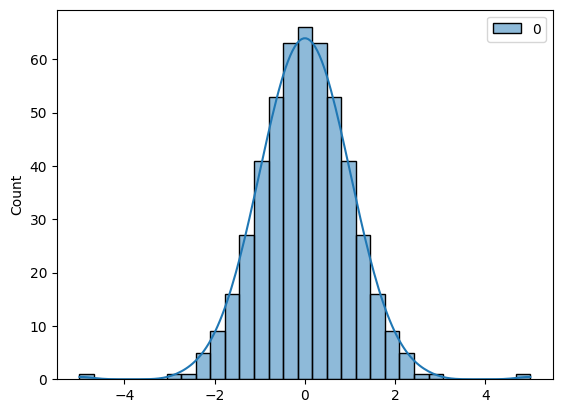

In [72]:
X_scaled = X_scaler.transform(df)

sns.histplot(X_scaled,kde=True)
plt.show()

In [73]:
X_scaled.mean(axis=0)

array([-8.8817842e-18])

In [74]:
X_scaled.std(axis=0)

array([1.])

In [75]:
Y_scaler=preprocessing.MinMaxScaler().fit(df)

In [76]:
Y_scaler.scale_

array([0.0961661])

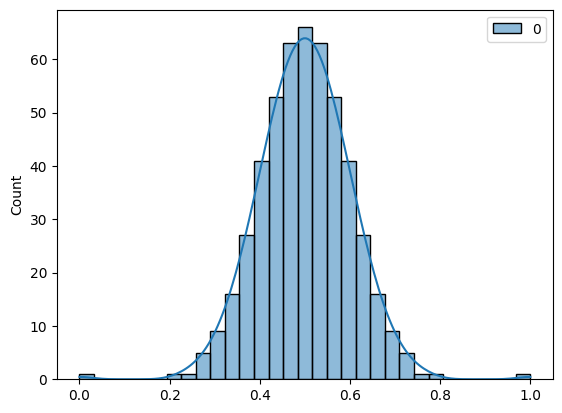

In [77]:
Y_scaled=Y_scaler.transform(df)

sns.histplot(Y_scaled,kde=True)
plt.show()

In [78]:
Y_scaled.mean(axis=0)

array([0.5])

In [79]:
Y_scaled.std(axis=0)


array([0.10006819])

<Axes: ylabel='Count'>

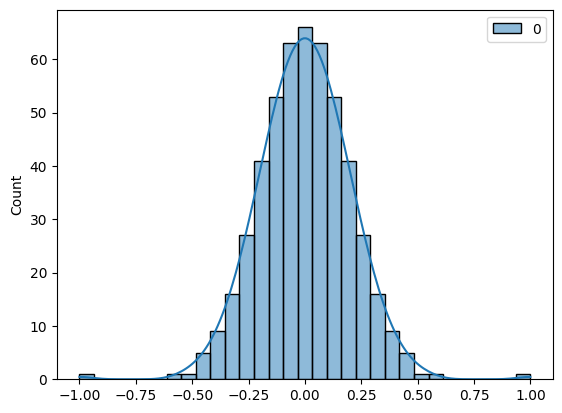

In [80]:
Z_scaler=preprocessing.MaxAbsScaler().fit(df)
Z_scaled=Z_scaler.transform(df)

sns.histplot(Z_scaled,kde=True)